# Classificatie van woorden in het Excelsheet

In dit Jupyter Notebook lezen we de genoemde woorden uit en bekijken we hoe "informatief" ze zijn. Als een artikel informatief is, dan betekent dat dat het artikel "anders" is dan de rest, en dat er veel woorden in voorkomen die in andere artikelen niet aanwezig zijn.

Op deze manier vind je makkelijk bepaalde codes, exacte data, e-mailadressen, postcodes en gesprekken met specifieke onderwerpen die je niet in de rest van de database zult vinden. Aangezien alles over "gaswinning" gaat, is dat bijvoorbeeld minder informatief dan het woordje "AZC", wat weer over specifieke scenario's zal gaan.

In [1]:
import pandas as pd
import numpy  as np

EXCEL_BESTAND  = 'preprocessed_data.xlsx'

We beginnen met het lezen van het bestand.

In [2]:
preprocessed_data = pd.read_excel(EXCEL_BESTAND)
preprocessed_data

,Unnamed: 0,id,type,date,betterDate,title,abstract
0,18,13.16,Overig,2015,NaT,Verzoek_regulier__facultatief_advies_uitgebr_p...,\n\n\n\n\n13.16 \n \n\nOns briefkenmerk: ...
1,29,8.17,Correspondentie,2007-2013,NaT,Toezicht_ Correspondentie n.a.v. Toezicht en H...,\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
2,31,22.11,Mail,??,NaT,FW Draaiboek demonstratie NAM AZC 24 sept...,"\n\n\nDate : 1-1-0001 00:00:00 \nTo : ""Marco O..."
3,32,32.3,Correspondentie,NaN,NaT,Uitgaande mail mededeling akkoord bijdrage aan...,\n\n\n\n\n| bijdrage gemeente Assen Pagina 1 \...
4,35,8.10,Vergunning,1997,NaT,Rapportage n.a.v. vergunningen-meldingen.pdf_j...,\n\n\n\n\n \ncle) \n \n\n\n\n\n\n\n\n\n\n\n...
...,...,...,...,...,...,...,...
2504,2537,32.1,Bestuurlijk besluit,2005-04-26 00:00:00,NaT,BenW besluit BB54473 inzake deelname gem Assen...,\n\n\nÀ \n\nfifi Gemeente Assen \n\n\n\n \n...
2505,2538,32.5,Document,2005-04-01 00:00:00,NaT,Persbericht Energy Valley_,\n\n\n\n\n32.5 \n \n\nÓ Gemeente Assen \n...
2506,2539,3.35,Mail,2004-12-13 00:00:00,2016-09-09 10:47:53,Melding betoging 24 september NAM,\n\n\n\n\n\n\nDate : 9-9-2016 10:47:53 \nF B n...
2507,2540,3.40,Document,2004-12-13 00:00:00,NaT,Locaties in Groningen_,\n\n\nCentrale meldkamer NAM Assen (CMK) \n\nB...


We passen toe dat elk woord in de string wordt opgeslagen in een dictionary.

In [3]:
CLASSIFIED_WORDS = {}

def add_words_to_dictionary(value):
    value = str(value).replace('\t', '    ').replace('\n', ' ').replace('\r', ' ').lower().split(' ')
    
    for word in value:
        if word == '':
            continue
        CLASSIFIED_WORDS[word] = 1 if word not in CLASSIFIED_WORDS else CLASSIFIED_WORDS[word] + 1

preprocessed_data['title']   .apply(add_words_to_dictionary)
preprocessed_data['abstract'].apply(add_words_to_dictionary)

CLASSIFIED_WORDS

{'verzoek_regulier__facultatief_advies_uitgebr_proc.doc_dd.': 1,
 'toezicht_': 2,
 'correspondentie': 72,
 'n.a.v.': 164,
 'toezicht': 90,
 'en': 70931,
 'handhaving.pdf_': 2,
 'fw': 360,
 'draaiboek': 110,
 'demonstratie': 75,
 'nam': 11013,
 'azc': 33,
 '24': 1061,
 'september': 1037,
 '2016': 3123,
 '??.pdf': 1,
 'uitgaande': 104,
 'mail': 857,
 'mededeling': 81,
 'akkoord': 305,
 'bijdrage': 461,
 'aan': 20841,
 'st._ongedateerd.pdf': 1,
 'rapportage': 312,
 'vergunningen-meldingen.pdf_juli-dec': 1,
 'diverse': 454,
 'tekeningen.pdf_dd': 1,
 'inkomende': 6,
 '1.pdf_dd': 1,
 'toezicht_rapporteren': 2,
 'vergunning_correspondentie': 3,
 'vergunningen-meldingen.pdf_': 2,
 'diversen_diverse': 1,
 'correspondentie.pdf_': 1,
 'handhaving': 109,
 '1.pdf_': 6,
 '1324187_1404734980943_3b._offerteformulier_inhuur.xls_?.pdf': 1,
 '1674527_1432733943438_3b._offerteformulier_inhuur.xls_?.pdf': 1,
 'brochure': 53,
 'drenthe': 2737,
 '4.0': 284,
 'met': 25123,
 'kaft.pdf_apr.mei': 1,
 '320755_132

Hoe vaak komt een individueel woord voor?

In [4]:
CLASSIFIED_WORDS['gaswinning']

5809

Met de volgende functie berekenen we hoe informatief een zeker bericht is op basis van de context (alle berichten) die we hier hebben.

In [5]:
from collections import Counter

def information_rate(content):
    words = str(content).replace('\t', '    ').replace('\n', ' ').replace('\r', ' ').lower().split(' ')
    total = 0
    
    words = Counter(words)
    
    for word in words:
        if word == '':
            continue
            
        try:
            rarity = CLASSIFIED_WORDS[word]
        except KeyError:
            rarity = 0
        appearance = words[word]
    
        total += appearance * appearance / rarity

    return total

information_rate('mailcontact')

0.2

We calculate the word relevance and then use the sigmoid function to spread it nicely between 0 and 1.

In [6]:
preprocessed_data['info_score']  = preprocessed_data['title']   .apply(information_rate)
preprocessed_data['info_score'] += preprocessed_data['abstract'].apply(information_rate)

preprocessed_data['norm_info_score'] = round(1 / (1 + np.exp(-1 * np.log10(preprocessed_data['info_score']))), 2)

preprocessed_data.sort_values(by='norm_info_score')

,Unnamed: 0,id,type,date,betterDate,title,abstract,info_score,norm_info_score
1602,1635,16.54,Mail,2016-12-13 00:00:00,NaT,2e versie advies winningsplan,\n\n\nRapport \nDecember 2016 \n \n\n1e conce...,0.025085,0.17
1145,1178,16.52,Mail,2017-05-12 00:00:00,NaT,1e concept zienswijze,\n\n\n11 Mei 2017 \n \nconcept \n\nZienswijze...,0.431546,0.41
592,625,5.8,Rapport,2018-04-30 00:00:00,NaT,2018-11574 Taxatierapport Schepersmaat Assen.pdf_,\n\n\nTaxatierapport \n\n \n\n\n\n\n\n\n\n\n\n...,1.451706,0.54
1800,1833,16.1324,Mail,2016-11-09 00:00:00,2016-11-09 12:47:56,raadvoorstel adviesrecht gaswinningsplan Weste...,\n\n\nDate : 9-11-2016 12:47:56 \nF nen! \nTo ...,2.370067,0.59
1694,1727,16.178,Mail,2016-12-05 00:00:00,2016-12-05 11:26:00,brief,\n\n\n\n\nDate : 5-12-2016 11:26:00 \n\n1 \nSu...,2.547637,0.60
...,...,...,...,...,...,...,...,...,...
2369,2402,12.22,Document,2011-08-02 00:00:00,NaT,20110801 LPG Berekening Shell BP Stadsbedri...,\n\n\n\n\n \nLPG groepsrisico berekeningsmo...,1421.785317,0.96
2377,2410,6.5,Correspondentie,2011-04-29 00:00:00,NaT,IB 2011.4514 inzake rapportage verkennend bode...,\n\n\n\n\nTauw bv 6.5 \n\nTa u WV Transportweg...,1166.138362,0.96
2453,2486,6.6,Correspondentie,2006-08-14 00:00:00,NaT,IB 200607018 Orienterend milieukundig bodemond...,\n\n\n\n\n6.6 \n \n\nSchepersmaat 2 \nPos...,1224.210239,0.96
1,29,8.17,Correspondentie,2007-2013,NaT,Toezicht_ Correspondentie n.a.v. Toezicht en H...,\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,1331.444640,0.96


In [7]:
preprocessed_data.to_csv('data.csv')

Met de onderstaande code kun je een specifiek artikel bekijken voor een steekproef.

In [8]:
print(preprocessed_data.loc[2453]['abstract'])






6.6 
      

Schepersmaat 2 
Postbus 28000 
9400 HH ASSEN 

Nederlandse Aardolie Maatschappij B.V. 









pe Es CD Telefoon : (0592) 369111 
Gemeent&SSlen | ô Telefax : (0592) 362200 

RA PSB | | NAM www.nam.nl 
Code: d 

Afdoen dd: 
pnt 

Gemeente Assen 15 AUG. 2006 | 

ge RE Le | AKAI 
Postbus Ù ie AM 2006007018 / 
9400 RA Assen CR TT 

| 
Uw ref: Onze ref: EP200 Bant Deerkiësar: (0592) 363451 Assen, 14 augustus 2006 

LSEP-H-L(LL) 











Onderwerp: Oriënterend milieukundig bodemonderzoek NAM-lokatie Assen 1 

Geachte novou 

Naar aanleiding van uw telefonisch verzoek rapportage aan te leveren omtrent een bodemkundig 
nulonderzoek van de NAM-locatie Assen , gelegen aan de Asserwijk, berichten wij u het volgende. 

De NAM-locatie Assen is in 1981 aangelegd en de aanwezige gasput op het locatieterrein is in 1982 
geboord. Voor de aanleg van het locatieterrein is geen bodemkundig nulonderzoek verricht, hetgeen 
destijds niet gebruikelijk was. 
Wel hebben wij, om een inventa

Wat zijn de meest gebruikte woorden?

In [9]:
common_words = [w for w in CLASSIFIED_WORDS.keys()]
common_words.sort(key=lambda x : CLASSIFIED_WORDS[x], reverse=True)
common_words[0:15]

['de',
 'van',
 'het',
 'en',
 'in',
 'een',
 'is',
 'op',
 'voor',
 'te',
 'dat',
 'met',
 'aan',
 'winningsplan',
 'u']

## Belangrijkheid finetunen

In het vorige stuk hebben we de belangrijkheid gesorteerd. Er is echter nog één klein probleem: de manier van het berekenen van informativiteit moedigt aan om artikelen zo lang mogelijk te schrijven - informativiteit kan nooit dalen naarmate er meer woorden worden toegevoegd.

Om dit tegen te gaan, kunnen we de 2-macht verlagen. Deze brengen naar een 1-macht zal echter ook niet helpen, omdat dit juist weer aanmoedigt om een zo KLEIN mogelijk artikel te schrijven.

Om deze reden gaan we de macht handmatig finetunen ronde de 0 en 5 om ervoor te zorgen dat er geen (of slechts een kleine) bias aanwezig is jegens een bepaalde bestandsgrootte, om op die manier zowel lange als korte relevante artikelen te kunnen vinden.

In [10]:
import seaborn as sns

def information_pow_rate(power):
    def exec(content):
        words = str(content).replace('\t', '    ').replace('\n', ' ').replace('\r', ' ').lower().split(' ')
        total = 0

        words = Counter(words)

        for word in words:
            if word == '':
                continue

            rarity     = CLASSIFIED_WORDS[word]
            appearance = words[word]

            total += appearance ** 2 / rarity

        return total
    return exec
    
def word_count(content):
    return len(str(content)
               .replace('\t', '    ')
               .replace('\n', ' ')
               .replace('\r', ' ')
               .lower().split(' ')
              )

def calculate_power(df, power):
    df['word_score'] =  df['title']   .apply(information_pow_rate(2))
    df['word_score'] += df['abstract'].apply(information_pow_rate(2))
    df['word_count'] =  df['title']   .apply(word_count)
    df['word_count'] += df['abstract'].apply(word_count)
    
    df['word_score'] = np.log10(df['word_score']) / np.log10(df['word_count']) ** power
    df['word_score'] = 1 / (1 + np.exp(-1 * df['word_score']))
    df['word_count'] = np.log2(df['word_count'])
    return df

In [11]:
# Sanity check - make sure it still runs as previously programmed
calculate_power(preprocessed_data, 2).sort_values(by='word_score')

,Unnamed: 0,id,type,date,betterDate,title,abstract,info_score,norm_info_score,word_score,word_count
1602,1635,16.54,Mail,2016-12-13 00:00:00,NaT,2e versie advies winningsplan,\n\n\nRapport \nDecember 2016 \n \n\n1e conce...,0.025085,0.17,0.395722,6.459432
1145,1178,16.52,Mail,2017-05-12 00:00:00,NaT,1e concept zienswijze,\n\n\n11 Mei 2017 \n \nconcept \n\nZienswijze...,0.431546,0.41,0.485186,8.243174
592,625,5.8,Rapport,2018-04-30 00:00:00,NaT,2018-11574 Taxatierapport Schepersmaat Assen.pdf_,\n\n\nTaxatierapport \n\n \n\n\n\n\n\n\n\n\n\n...,1.451706,0.54,0.506987,7.994353
1694,1727,16.178,Mail,2016-12-05 00:00:00,2016-12-05 11:26:00,brief,\n\n\n\n\nDate : 5-12-2016 11:26:00 \n\n1 \nSu...,2.547637,0.60,0.515145,8.599913
1360,1393,30.32,Mail,2017-01-31 00:00:00,2017-01-31 16:00:03,memo vervolg procedure gaswinning t.b.v. overl...,\n\n\nDate : 31-1-2017 16:00:03 \nF | \nTo : M...,3.298074,0.63,0.517091,9.144658
...,...,...,...,...,...,...,...,...,...,...,...
483,516,2.8,Document,2018-07-19 00:00:00,NaT,2018-07-19 Voorstellen tekstaanpassingen broch...,\n\n\nVoorstel Tekstuele aanpassingen brochure...,6.113983,0.69,0.592779,4.807355
2432,2465,26.10,Bestuurlijk besluit,2008-03-17 00:00:00,NaT,BenW besluit BB00368 inzake Realisatie Culture...,\n\nFile to large to process automatically.\n\...,6.927888,0.70,0.593376,4.954196
2047,2080,16.35,Rapport,2016-06-21 00:00:00,NaT,Seismiciteit_onshore_gasvelden_Nederland.pdf_,\n\nFile to large to process automatically.\n\...,6.670099,0.70,0.606499,4.584963
661,694,4.16,Bestuurlijk besluit,2018-03-11 00:00:00,NaT,BB 2008-00340 subsidieverzoek NAM tot NAM loop...,\n\n\n4.16\n\n\n\n\n\n\n\nSize:838029\nDate:20...,7.070427,0.70,0.612562,4.523562


(<AxesSubplot:xlabel='word_count', ylabel='word_score'>,
 <AxesSubplot:xlabel='word_count', ylabel='word_score'>,
 <AxesSubplot:xlabel='word_count', ylabel='word_score'>)

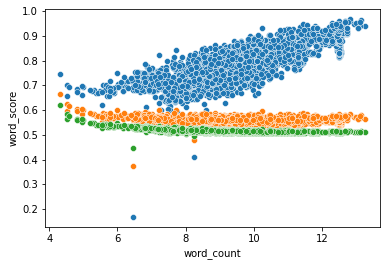

In [12]:
def plot_at_power(power):
    return sns.scatterplot(
                data=calculate_power(preprocessed_data, power), 
                x='word_count', y='word_score'
            )

plot_at_power(0), plot_at_power(1.7), plot_at_power(3)

#plot_at_power(getal)   # <-- Speel dus een beetje door hier bij "getal" een getal in te voeren.
                        #     Probeer de grafiek een zo recht mogelijke lijn te maken.

In [13]:
calculate_power(preprocessed_data, 1.7).sort_values(by='word_score').tail(10)

,Unnamed: 0,id,type,date,betterDate,title,abstract,info_score,norm_info_score,word_score,word_count
2361,2394,12.74,Vergunningaanvraag,2012-02-06 00:00:00,NaT,320755_1328532479750_Locatie_Vries_1_wabo_revi...,\n\n\n\n\n12.74 \n \n\nWORKFLOOR INSTRUCT...,425.177668,0.93,0.595752,10.239599
1074,1107,31.21,Mail,2017-05-18 00:00:00,2017-05-18 10:54:38,Bijeenkomsten EZ over gaswinning,\n\n\n\n\n Date : 18-5-2017 10:54:38 \n31.2...,47.523473,0.84,0.598634,7.721099
24,57,33.1,Onbekend,NaN,NaT,33.1 WOB-verzoek 2019-04-12 Shell Papers - Map...,\n\n\n\n\n33.1 \n \n\nInspraak- en reacti...,12.342099,0.75,0.599182,5.977280
154,187,2.36,Mail,2019-01-25 00:00:00,2019-01-25 11:26:47,Drenthe 4.0NAMRES,\n\n\nDate : 25-1-2019 11:26:47 2.36 \n\nFrom:...,6.516857,0.69,0.600181,5.000000
1390,1423,16.1266,Mail,2017-01-23 00:00:00,2018-06-27 16:04:52,afspraken met NAM en SHELL,\n\n\n16.1266 \nDate : 27-6-2018 16:04:52 \nFr...,34.931086,0.82,0.601673,7.219169
483,516,2.8,Document,2018-07-19 00:00:00,NaT,2018-07-19 Voorstellen tekstaanpassingen broch...,\n\n\nVoorstel Tekstuele aanpassingen brochure...,6.113983,0.69,0.603362,4.807355
2432,2465,26.10,Bestuurlijk besluit,2008-03-17 00:00:00,NaT,BenW besluit BB00368 inzake Realisatie Culture...,\n\nFile to large to process automatically.\n\...,6.927888,0.70,0.604939,4.954196
2047,2080,16.35,Rapport,2016-06-21 00:00:00,NaT,Seismiciteit_onshore_gasvelden_Nederland.pdf_,\n\nFile to large to process automatically.\n\...,6.670099,0.70,0.616928,4.584963
661,694,4.16,Bestuurlijk besluit,2018-03-11 00:00:00,NaT,BB 2008-00340 subsidieverzoek NAM tot NAM loop...,\n\n\n4.16\n\n\n\n\n\n\n\nSize:838029\nDate:20...,7.070427,0.70,0.623059,4.523562
6,37,8.11,Diversen,2003,NaT,Diverse inkomende correspondentie 1.pdf_dd,"No plain text found in pdf, Optical Character ...",11.695397,0.74,0.664362,4.321928


In [14]:
print(preprocessed_data.loc[1074]['abstract'])






    Date : 18-5-2017 10:54:38 
31.21 
  

nn 
ed 

nn nn nn 
2 atv an-nl, "Assen leeft" info@assenleeft.nl, '"Assen Stad'' redactie @assenstad.nl, "Asser Courant'' info@assercourant.nl, '"Asser Journaal'' 

info@asserjournaal.nl, "Berichten van de Brink" Berichtenvandebrink@assen.nl, Ek prplanet-nl, "bessels boom'' w.bessels@boom.nl, 

nn nn 
BN zieeo.nl Griffier" griffier@assen.nl, "EN" info@nieuwsinassen.nl, Ks Cl, 

nn O0 nn 
nn | nn 

nn | | | nn 
ME ss enol, "'' info@spiegelgrafie.nl, "NN pbrjournalistiek@gmail.com, * _orger Krant" datstaat@planet.nl, 'postteam'' 
postteam@assen.nl, "redactie assen boom" redactie.assen@boom.nl, "Redactie Dagblad Assen" assen(@dvhn.nl, "Redactie RTV Drenthe" redactie@rtvdrenthe.nl, 

nn nn 
Subject : Bijeenkomsten EZ over gaswinning 

Geachte redactie, 

Volgende week belegt het ministerie van EZ drie informatiebijeenkomsten over het ontwerpbesluit gaswinning Westerveld. De bijeenkomsten worden gehouden in cafe Poken in 

Ekehaar (22 mei) en i

## Woorden zoeken & matchen

Tot nu toe hebben we de informatiedichtheid van artikelen bepaald. In dit stuk gaan we kijken hoe we artikelen kunnen vinden die de opgegeven zoekwoorden zo veel mogelijk matchen.

**Let op!** Er was uiteindelijk geen tijd meer over om dit gedeelte te gebruiken, maar het leek ons desalniettemin goed om te laten zien voor als het interessant zou kunnen zijn.

In [15]:
def relevance_to_words_func(search_words):
    def calculate_relevance(content):
        words = str(content).replace('\t', '    ').replace('\n', ' ').replace('\r', ' ').lower().split(' ')
        total = 0

        words = Counter(words)

        for word in words:
            if word not in search_words:
                continue

            rarity     = CLASSIFIED_WORDS[word]
            appearance = words[word]

            total += appearance * appearance / rarity

        return total
    return calculate_relevance

def calculate_relevance(df, words):
    return df['title'].apply(relevance_to_words_func(words)) + df['abstract'].apply(relevance_to_words_func(words))

In [16]:
SEARCH_TERMS = ['de', 'het', 'een', 'u', '??.pdf']

preprocessed_data['relative_relevance'] = calculate_relevance(preprocessed_data, SEARCH_TERMS) 
preprocessed_data.sort_values(
    by='relative_relevance'
)

,Unnamed: 0,id,type,date,betterDate,title,abstract,info_score,norm_info_score,word_score,word_count,relative_relevance
1950,1983,22.22,Mail,2016-09-12 00:00:00,2016-09-08 11:10:27,NAM,\n\n\nDate : 8-9-2016 11:10:27 22.22 \n| F \n\...,4.656672,0.66,0.583859,4.954196,0.000000
1579,1612,16121,Mail,2016-12-14 00:00:00,2016-12-14 16:12:19,Automatisch antwoord overleg gezamenlijk advi...,\n\n\n\n\nDate : 14-12-2016 16:12:19 \nFe hd 1...,5.619883,0.68,0.558302,6.584963,0.000000
2349,2382,12.69,Vergunningaanvraag,2012-02-06 00:00:00,NaT,320755_1328532108096_Locatie_Vries_1_wabo_revi...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,9.905865,0.73,0.570046,6.977280,0.000000
2346,2379,12.85,Document,2012-02-09 00:00:00,NaT,320755_1328800562968_Archiveringsoverzicht.pdf_,\n\n\nArchivering \n\nArchivering \n\nAanvraag...,377.320087,0.93,0.582916,11.034799,0.000000
1104,1137,16.455,Mail,2017-05-17 00:00:00,2017-05-17 10:09:58,Geaccepteerd overleg PlasBossinade - zienswij...,\n\n\nDate : 17-5-2017 10:09:58 16.455 \n\nFro...,5.380608,0.67,0.577112,5.491853,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
801,834,16.17,Rapport,2017-11-07 00:00:00,NaT,Evaluatie van adviesrecht Winningsplannen klei...,\n\n\n\n\nEvaluatie Adviesrecht Winningsplanne...,101.413183,0.88,0.552384,12.518899,1.735370
121,154,17.15,Mail,2019-02-15 00:00:00,2019-02-15 11:25:34,Fwd Tcbb_LAAM-ontwerp-advies_concept_08-0...,\n\n\nDate : 15-2-2019 11:25:34 17.15 \nFrom: ...,109.679375,0.88,0.553489,12.487840,1.747332
916,949,16.422,Mail,2017-06-26 00:00:00,NaT,FW Zienswijze zoals verstuurd naar EZ,\n\n\n16.422\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,144.155007,0.90,0.556697,12.471929,1.779526
65,98,16.39,Rapport,2019-03-26 00:00:00,NaT,Tcbb-advies Landelijke Aanpak Afhandeling Mijn...,"\n\n\n\n\n16.39 \n \n\nMijnbouwschade, wa...",84.440941,0.87,0.550762,12.454299,1.787711


In [17]:
calculate_relevance(preprocessed_data, SEARCH_TERMS)

0       0.035309
1       0.413397
2       1.000872
3       0.000575
4       0.000000
          ...   
2504    0.145028
2505    0.015493
2506    0.004900
2507    0.000007
2508    0.433692
Length: 2509, dtype: float64